# WeatherPy: An Analysis of World Weather Data using OpenWeatherMap API Citipy, Pandas, & Matplotlib
UCIRV201902DATA3 <br>
Submitted by K. Harrison <br>
02-APR-2019

#### Skills
Python, API Scraping, JSON, Citipy, Pandas, Numpy, Matplotlib/Plotly
___

## Data Wrangling

### Background
Current weather data, including temperature, humtidy, windspeed, and cloudiness, is sampled for 1500 random cities using the OpenWeatherMap API.  The data is plotted to determine the relationships between the cities location (latitude) and the weather variables to determine trends.

In [3]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import datetime
from citipy import citipy
from config import api_key

### Citipy
Use citipy library to convert random coordiantes to nearest cities.

In [4]:
#generate random numbers for latitude and longitude coordinates; zip into list
lat = np.random.uniform(-90, 90, size=10000)
lon = np.random.uniform(-180, 180, size=10000)
coordinates = zip(lat, lon)

#using citipy, find the the nearest city to the coordinates
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
    
#initialize city_names list to store citipy data
city_names = []

#store actual city names into new list for only unique values
for city in cities:
        name = city.city_name
        name = name.title()
        if name not in city_names:
            city_names.append(name)

### OpenWeatherMap API Scraping
Call on OpenWeatherMap API to gather weather data from around the world and print log.

In [5]:
#set base url and units for API call
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

#initialize variable counter; city_data dictionary to store weather data
counter = 0
city_data = {}

#record start time of api calls; format print output
api_start = datetime.datetime.now()
print('-------------------------------------------------')
print(f'Time at Beginning API Calls: {api_start.strftime("%Y-%m-%d %H:%M")}')
print('-------------------------------------------------')
      
#call on api using each city name
for city in city_names:
    if counter < 1500: #set number of cities to return
        url = f'{base_url}{city}&APPID={api_key}&units={units}' #append base_url with city name
        request = requests.get(url).json() #get request
      
        #determine if city name is a part of OWM (request will return 200 if found)  
        if request['cod'] == 200: 
            print(f'Record {counter + 1}:')
            
            #store city data into dictionary
            city_data[city] = {}
            city_data[city]['Latitude'] = request['coord']['lat']
            city_data[city]['Longitude'] = request['coord']['lon']
            city_data[city]['Current Temp F'] = request['main']['temp']
            city_data[city]['Max Temp F'] = request['main']['temp_max']
            city_data[city]['Humitidy %'] = request['main']['humidity']
            city_data[city]['Cloudiness %'] = request['clouds']['all']
            city_data[city]['Wind Speed'] = request['wind']['speed']
            city_data[city]['Country'] = request['sys']['country']
            country = request['sys']['country']
            print(f'     Data retrieved for {city}, {country}')
            counter +=1
      
        #if city cannot be found in OWM, print statement and skip to next.
        else:
            print(f"{city} cannot be found. Skipping to next city.")

#once calls are complete, store end time and calculate duration    
api_end = datetime.datetime.now()
api_duration = (api_end - api_start).total_seconds()

#print time info to log
print('-------------------------------------------------')
print(f'Time at End of API Calls: {api_end.strftime("%Y-%m-%d %H:%M")}')
print(f'The API Calls took {round(api_duration)} seconds.')
print('-------------------------------------------------')


-------------------------------------------------
Time at Beginning API Calls: 2019-03-24 23:38
-------------------------------------------------
Record 1:
     Data retrieved for Mataura, NZ
Record 2:
     Data retrieved for Ladovskaya Balka, RU
Record 3:
     Data retrieved for Iqaluit, CA
Record 4:
     Data retrieved for Arraial Do Cabo, BR
Record 5:
     Data retrieved for Khani, GE
Record 6:
     Data retrieved for Qasigiannguit, GL
Record 7:
     Data retrieved for Sfantu Gheorghe, RO
Record 8:
     Data retrieved for Souillac, FR
Record 9:
     Data retrieved for Atuona, PF
Korla cannot be found. Skipping to next city.
Record 10:
     Data retrieved for Cabo San Lucas, MX
Toliary cannot be found. Skipping to next city.
Record 11:
     Data retrieved for Hilo, US
Record 12:
     Data retrieved for Gat, SN
Record 13:
     Data retrieved for Dikson, RU
Record 14:
     Data retrieved for Albany, US
Record 15:
     Data retrieved for Yerbogachen, RU
Record 16:
     Data retrieved fo

Record 150:
     Data retrieved for Chara, GR
Record 151:
     Data retrieved for Vestmannaeyjar, IS
Record 152:
     Data retrieved for Vardo, US
Record 153:
     Data retrieved for Annau, TM
Record 154:
     Data retrieved for Nioro, GM
Record 155:
     Data retrieved for Coquimbo, CL
Record 156:
     Data retrieved for Cortez, US
Record 157:
     Data retrieved for Chatrapur, IN
Record 158:
     Data retrieved for Conde, BR
Record 159:
     Data retrieved for Victoria, BN
Record 160:
     Data retrieved for Ancud, CL
Chagda cannot be found. Skipping to next city.
Record 161:
     Data retrieved for Nabinagar, BD
Record 162:
     Data retrieved for Chitral, PK
Record 163:
     Data retrieved for Kamenka, RU
Illoqqortoormiut cannot be found. Skipping to next city.
Record 164:
     Data retrieved for Rosarito, CO
Record 165:
     Data retrieved for Austin, US
Record 166:
     Data retrieved for Poum, MK
Record 167:
     Data retrieved for Thanh Hoa, VN
Record 168:
     Data retrieved f

Leer cannot be found. Skipping to next city.
Record 294:
     Data retrieved for Karanpura, IN
Record 295:
     Data retrieved for Merrill, US
Record 296:
     Data retrieved for Sambava, MG
Record 297:
     Data retrieved for Milkovo, BG
Record 298:
     Data retrieved for Tutoia, BR
Record 299:
     Data retrieved for Mawlaik, MM
Record 300:
     Data retrieved for Muravlenko, RU
Record 301:
     Data retrieved for Zyryanka, RU
Record 302:
     Data retrieved for Mackay, CA
Record 303:
     Data retrieved for Anzio, IT
Record 304:
     Data retrieved for Lazaro Cardenas, MX
Record 305:
     Data retrieved for Kroya, ID
Record 306:
     Data retrieved for Roald, NO
Record 307:
     Data retrieved for Tirano, IT
Record 308:
     Data retrieved for Front Royal, US
Record 309:
     Data retrieved for Ulaanbaatar, MN
Record 310:
     Data retrieved for Nabire, ID
Record 311:
     Data retrieved for Altagracia De Orituco, VE
Record 312:
     Data retrieved for Gobabis, NA
Olafsvik cannot b

Record 445:
     Data retrieved for Port Hedland, AU
Record 446:
     Data retrieved for Coahuayana, MX
Record 447:
     Data retrieved for Zhigansk, RU
Record 448:
     Data retrieved for Emba, CY
Record 449:
     Data retrieved for Atherton, GB
Record 450:
     Data retrieved for Bambui, CM
Record 451:
     Data retrieved for Ulladulla, AU
Record 452:
     Data retrieved for Banda Aceh, ID
Record 453:
     Data retrieved for Non Sang, TH
Bisho cannot be found. Skipping to next city.
Record 454:
     Data retrieved for Scarborough, GB
Record 455:
     Data retrieved for Hamilton, CA
Record 456:
     Data retrieved for Tinskoy, RU
Record 457:
     Data retrieved for Timmins, CA
Record 458:
     Data retrieved for Lyaskelya, RU
Record 459:
     Data retrieved for Wichita Falls, US
Record 460:
     Data retrieved for Boyolangu, ID
Record 461:
     Data retrieved for La Libertad, PE
Record 462:
     Data retrieved for Roma, IT
Haapu cannot be found. Skipping to next city.
Ust-Kamchatsk ca

Record 597:
     Data retrieved for Guerrero Negro, MX
Record 598:
     Data retrieved for Antalaha, MG
Sorvag cannot be found. Skipping to next city.
Record 599:
     Data retrieved for Dandong, CN
Record 600:
     Data retrieved for Sharlyk, RU
Record 601:
     Data retrieved for Mbengwi, CM
Record 602:
     Data retrieved for Sistranda, NO
Record 603:
     Data retrieved for Beringovskiy, RU
Viligili cannot be found. Skipping to next city.
Record 604:
     Data retrieved for Acurenam, GA
Armacao Dos Buzios cannot be found. Skipping to next city.
Record 605:
     Data retrieved for Udachnyy, RU
Record 606:
     Data retrieved for Escanaba, US
Record 607:
     Data retrieved for Choma, ZM
Alotau cannot be found. Skipping to next city.
Record 608:
     Data retrieved for Poplar Bluff, US
Record 609:
     Data retrieved for Huayucachi, PE
Litoral Del San Juan cannot be found. Skipping to next city.
Record 610:
     Data retrieved for Vanimo, PG
Record 611:
     Data retrieved for Clyde 

Record 745:
     Data retrieved for Orsha, BY
Record 746:
     Data retrieved for Hammerfest, NO
Record 747:
     Data retrieved for Qaqortoq, GL
Record 748:
     Data retrieved for Milledgeville, US
Record 749:
     Data retrieved for Hailey, US
Record 750:
     Data retrieved for Codrington, AU
Record 751:
     Data retrieved for Kyzyl-Suu, KG
Record 752:
     Data retrieved for Straubing, DE
Record 753:
     Data retrieved for Port Maria, JM
Record 754:
     Data retrieved for Lujiang, CN
Tabarqah cannot be found. Skipping to next city.
Record 755:
     Data retrieved for Staroleushkovskaya, RU
Record 756:
     Data retrieved for Kokopo, PG
Record 757:
     Data retrieved for Yangambi, CD
Record 758:
     Data retrieved for Poso, ID
Record 759:
     Data retrieved for Lalibela, ET
Record 760:
     Data retrieved for Glens Falls, US
Record 761:
     Data retrieved for Otjimbingwe, NA
Record 762:
     Data retrieved for Sabang, PH
Record 763:
     Data retrieved for Amapa, HN
Jahrom c

Record 902:
     Data retrieved for Udomlya, RU
Record 903:
     Data retrieved for Guadalupe Y Calvo, MX
Record 904:
     Data retrieved for Ust-Ishim, RU
Record 905:
     Data retrieved for Kjollefjord, NO
Record 906:
     Data retrieved for Belem De Sao Francisco, BR
Record 907:
     Data retrieved for Marsaxlokk, MT
Record 908:
     Data retrieved for Kerepehi, NZ
Record 909:
     Data retrieved for Okha, RU
Record 910:
     Data retrieved for Pokhara, NP
Record 911:
     Data retrieved for Mago, RU
Record 912:
     Data retrieved for Chimore, BO
Record 913:
     Data retrieved for Edd, ER
Record 914:
     Data retrieved for Alice Springs, AU
Record 915:
     Data retrieved for Pundaguitan, PH
Record 916:
     Data retrieved for Mlonggo, ID
Record 917:
     Data retrieved for Osoyoos, CA
Record 918:
     Data retrieved for Cody, US
Record 919:
     Data retrieved for Dulce Nombre De Culmi, HN
Record 920:
     Data retrieved for San Carlos De Bariloche, AR
Record 921:
     Data retr

Record 1047:
     Data retrieved for Xudat, AZ
Record 1048:
     Data retrieved for La Paz, MX
Record 1049:
     Data retrieved for Ustka, PL
Record 1050:
     Data retrieved for Sault Sainte Marie, CA
Record 1051:
     Data retrieved for Biankouma, CI
Record 1052:
     Data retrieved for Knysna, ZA
Record 1053:
     Data retrieved for Northport, US
Record 1054:
     Data retrieved for Jaromerice Nad Rokytnou, CZ
Record 1055:
     Data retrieved for Nancha, CN
Record 1056:
     Data retrieved for Havelock, US
Record 1057:
     Data retrieved for Kihei, US
Tambopata cannot be found. Skipping to next city.
Record 1058:
     Data retrieved for Rio Cuarto, AR
Record 1059:
     Data retrieved for Wajima, JP
Record 1060:
     Data retrieved for Kaduy, RU
Record 1061:
     Data retrieved for Caucaia, BR
Coalcoman cannot be found. Skipping to next city.
Record 1062:
     Data retrieved for Khandyga, RU
Record 1063:
     Data retrieved for Amahai, ID
Record 1064:
     Data retrieved for Bajil, 

Record 1194:
     Data retrieved for Kedougou, SN
Record 1195:
     Data retrieved for Aliaga, PH
Harunabad cannot be found. Skipping to next city.
Record 1196:
     Data retrieved for Sydney, AU
Record 1197:
     Data retrieved for Leh, IN
Record 1198:
     Data retrieved for Chumphon, TH
Record 1199:
     Data retrieved for Manavalakurichi, IN
Record 1200:
     Data retrieved for Alamogordo, US
Record 1201:
     Data retrieved for Bexhill, GB
Record 1202:
     Data retrieved for Ondjiva, AO
Record 1203:
     Data retrieved for Pocone, BR
Jinchengjiang cannot be found. Skipping to next city.
Record 1204:
     Data retrieved for Innisfail, CA
Record 1205:
     Data retrieved for Emmen, NL
Record 1206:
     Data retrieved for Bumba, CD
Record 1207:
     Data retrieved for Ukiah, US
Record 1208:
     Data retrieved for Baherden, TM
Record 1209:
     Data retrieved for Lima, PE
Record 1210:
     Data retrieved for Toucheng, TW
Record 1211:
     Data retrieved for Canals, ES
Record 1212:
 

Record 1338:
     Data retrieved for Iracoubo, GF
Record 1339:
     Data retrieved for Hermiston, US
Record 1340:
     Data retrieved for Babylon, US
Record 1341:
     Data retrieved for General Pico, AR
Record 1342:
     Data retrieved for Mayya, RU
Record 1343:
     Data retrieved for Villa Altagracia, DO
Record 1344:
     Data retrieved for Beni Suef, EG
Record 1345:
     Data retrieved for Flers, FR
Record 1346:
     Data retrieved for Azoyu, MX
Record 1347:
     Data retrieved for Fort Saint James, CA
Record 1348:
     Data retrieved for Erenhot, CN
Record 1349:
     Data retrieved for Khash, IR
Record 1350:
     Data retrieved for Manali, IN
Record 1351:
     Data retrieved for Ostroleka, PL
Record 1352:
     Data retrieved for Nongan, CN
Record 1353:
     Data retrieved for Kyakhta, RU
Record 1354:
     Data retrieved for Ust-Kuyga, RU
Record 1355:
     Data retrieved for Watsa, CD
Record 1356:
     Data retrieved for Jutai, BR
Record 1357:
     Data retrieved for Jinka, ET
Reco

Record 1491:
     Data retrieved for Naryan-Mar, RU
Record 1492:
     Data retrieved for Ourossogui, SN
Aporawan cannot be found. Skipping to next city.
Record 1493:
     Data retrieved for Grants, US
Record 1494:
     Data retrieved for Balabac, PH
Record 1495:
     Data retrieved for Koboko, UG
Record 1496:
     Data retrieved for Ola, RU
Record 1497:
     Data retrieved for Tieling, CN
Record 1498:
     Data retrieved for Anrochte, DE
Record 1499:
     Data retrieved for Oxford, US
Record 1500:
     Data retrieved for Pajic Polje, BA
-------------------------------------------------
Time at End of API Calls: 2019-03-24 23:47
The API Calls took 506 seconds.
-------------------------------------------------


### Pandas
Use pandas to convert weather dictionary into data frame for analysis.

In [6]:
# convert city_data dict to pandas dataframe
city_df = pd.DataFrame(city_data)

#store weather variables for plotting
latitude = city_df.loc['Latitude']
longitude = city_df.loc['Longitude']
maximumtemp = city_df.loc['Max Temp F']
currenttemp = city_df.loc['Current Temp F']
cloudiness = city_df.loc['Cloudiness %']
humitidy = city_df.loc['Humitidy %']
windspeed = city_df.loc['Wind Speed']
country = city_df.loc['Country']

### CSV File
Save source data to csv file.

In [7]:
#create a dataframe to be saved to csv
city_csv = city_df

#clean dataframe
city_csv = city_csv.transpose()
city_csv = city_csv.reset_index()

#sort city names to be alphabetical
city_csv = city_csv.sort_values('index')
city_csv = city_csv.set_index('index')

#organize columns
city_csv = city_csv[['Country', 'Latitude','Longitude', 'Max Temp F', 'Current Temp F',
                     'Humitidy %','Cloudiness %','Wind Speed']]
#name index to "City"
city_csv.index.name = "City"

#export to CSV file
city_csv.to_csv('Data/CityData.csv')

___
## Data Visualizations

###  Temperatures
#### Observations
From the data, it appears clear that there is a relationship between the degrees latitude of the city and the temperature. That is, the closer a city gets to the equator (latitude = 0 degrees), the warmer the temperature. At the time the data was samples, the maximum temperatures occured within +/- 20 degrees of the equator.  The coldest temperatures were recorded at or near the north pole (latitude = 80 degrees).

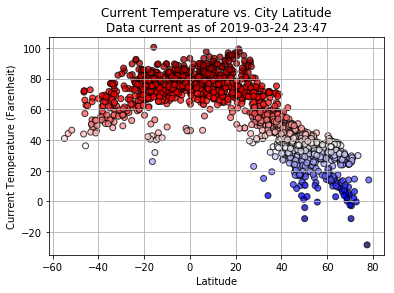

In [8]:
#create scatter plot of current temperature using color mapping to show temperatures values
plt.scatter(latitude, currenttemp, c=currenttemp, alpha=.75, edgecolor='black', cmap='seismic')

#format grpah & save to file
plt.title(f'Current Temperature vs. City Latitude\nData current as of {api_end.strftime("%Y-%m-%d %H:%M")}')
plt.xlabel('Latitude')
plt.ylabel('Current Temperature (Farenheit)')
plt.grid(True)
plt.savefig('Figures/TemperatureByLatitude.png')
plt.show()

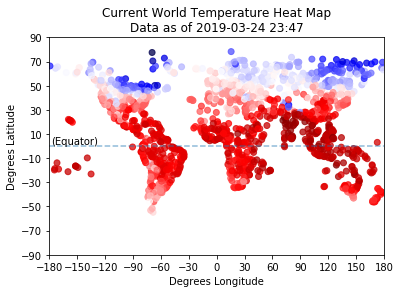

In [9]:
#create scatter plot of longitude and latitude to map out cities, using current temp as color scale
plt.scatter(longitude, latitude, c=currenttemp, cmap='seismic', alpha=.75)

#format and save figure
plt.title(f'Current World Temperature Heat Map\nData as of {api_end.strftime("%Y-%m-%d %H:%M")}')
plt.xlabel('Degrees Longitude')
plt.ylabel('Degrees Latitude')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
xticks = np.arange(-180, 181, 30)
yticks = np.arange(-90, 91, 20)
plt.xticks(xticks)
plt.yticks(yticks)
          
#add equator
plt.axhline(y=0, alpha=.5, linestyle='--')
plt.text(-178, 2, '(Equator)')
          
#save figure
plt.savefig('Figures/WorldHeatMap.png')
plt.show()

###  Humidity
#### Observations
Humidity percentage appears to be independent of the city latitude.  That is, there is at least 1 or more cities at most recordable latitudes that record 100% humitidy.  In general, the lower humidity areas appear to be just north of the equator (0 to 40 degrees).  Looking at humidity by location (world map), we get a sense of how each locations in each continent can impact humidity.  For example, the desert areas of Africa show very dry, but the coastal areas show more humid.

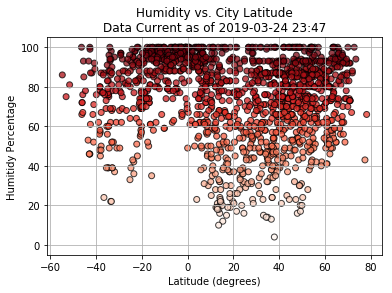

In [10]:
#create scatter plot of humidity using color mapping to show temperatures values
plt.scatter(latitude, humitidy, c=humitidy, alpha=.75, edgecolor='black', cmap='Reds')

#format grpah & save to file
plt.title(f'Humidity vs. City Latitude\nData Current as of {api_end.strftime("%Y-%m-%d %H:%M")}')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humitidy Percentage')
plt.grid(True)
plt.ylim(-5, 105) #needed for bug where some cities show humidity of 300%
plt.savefig('Figures/HumidityByLatitude.png')
plt.show()

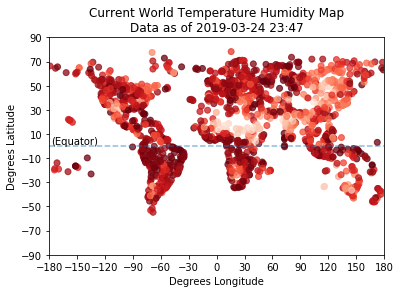

In [11]:
#create scatter plot of longitude and latitude to map out cities, using current temp as color scale
plt.scatter(longitude, latitude, c=humitidy, cmap='Reds', alpha=.75)

#format and save figure
plt.title(f'Current World Temperature Humidity Map\nData as of {api_end.strftime("%Y-%m-%d %H:%M")}')
plt.xlabel('Degrees Longitude')
plt.ylabel('Degrees Latitude')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
xticks = np.arange(-180, 181, 30)
yticks = np.arange(-90, 91, 20)
plt.xticks(xticks)
plt.yticks(yticks)
          
#add equator
plt.axhline(y=0, alpha=.5, linestyle='--')
plt.text(-178, 2, '(Equator)')
          
#save figure
plt.savefig('Figures/WorldHumidityMap.png')
plt.show()

###  Cloud Coverage
#### Observations
Cloud percentage also appears to be indepedent of latitude.  Looking at the cloud percentage on the world map, it can be observed that certain regions might be more susceptible to cloud coverage.  For example, the pacific northwest to the Great Lakes of the US shows heavy cloud coverage.  It is important to note that since this is a "snapshot in time", these trend could change based on weather patterns or time of year.  For more accurate analysis, it would be advised to take multiple samples to complete the analysis.

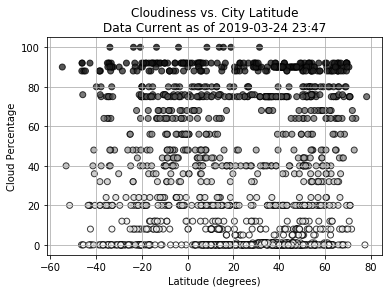

In [12]:
#create scatter plot of cloud percentage using color mapping to show cloud % values on binary scale
plt.scatter(latitude, cloudiness, c=cloudiness, alpha=.75, edgecolor='black', cmap='Greys')

#format grpah & save to file
plt.title(f'Cloudiness vs. City Latitude\nData Current as of {api_end.strftime("%Y-%m-%d %H:%M")}')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloud Percentage')
plt.grid(True)
plt.savefig('Figures/CloudinessByLatitude.png')
plt.show()

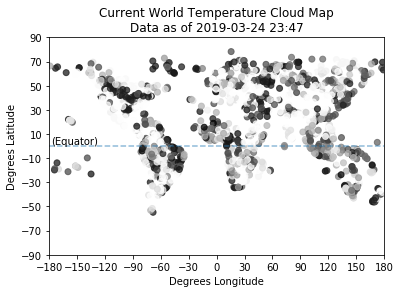

In [13]:
#create scatter plot of longitude and latitude to map out cities, using current temp as color scale
plt.scatter(longitude, latitude, c=cloudiness, cmap='Greys', alpha=.75)

#format and save figure
plt.title(f'Current World Temperature Cloud Map\nData as of {api_end.strftime("%Y-%m-%d %H:%M")}')
plt.xlabel('Degrees Longitude')
plt.ylabel('Degrees Latitude')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
xticks = np.arange(-180, 181, 30)
yticks = np.arange(-90, 91, 20)
plt.xticks(xticks)
plt.yticks(yticks)
          
#add equator
plt.axhline(y=0, alpha=.5, linestyle='--')
plt.text(-178, 2, '(Equator)')
          
#save figure
plt.savefig('Figures/WorldCloudMap.png')
plt.show()

###  WIndspeed
#### Observations
Windspeed, like cloud converage, is hard to analyze based on one time sample as in the study.  Futher, there does not appear to be any regional impact to wind speed.

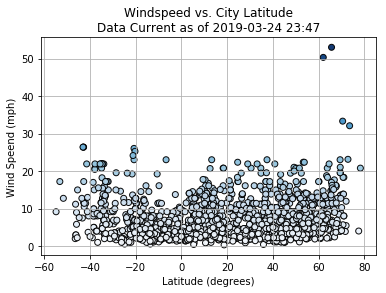

In [14]:
#create scatter plot of windspeed using color mapping to show cloud % values on binary scale
plt.scatter(latitude, windspeed, c=windspeed, alpha=.95, edgecolor='black', cmap='Blues')

#format grpah & save to file
plt.title(f'Windspeed vs. City Latitude\nData Current as of {api_end.strftime("%Y-%m-%d %H:%M")}')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speend (mph)')
plt.grid(True)
plt.savefig('Figures/WindSpeedByLatitude.png')
plt.show()

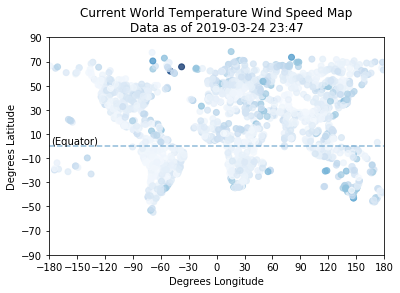

In [15]:
#create scatter plot of longitude and latitude to map out cities, using current temp as color scale
plt.scatter(longitude, latitude, c=windspeed, cmap='Blues', alpha=.75)

#format and save figure
plt.title(f'Current World Temperature Wind Speed Map\nData as of {api_end.strftime("%Y-%m-%d %H:%M")}')
plt.xlabel('Degrees Longitude')
plt.ylabel('Degrees Latitude')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
xticks = np.arange(-180, 181, 30)
yticks = np.arange(-90, 91, 20)
plt.xticks(xticks)
plt.yticks(yticks)
          
#add equator
plt.axhline(y=0, alpha=.5, linestyle='--')
plt.text(-178, 2, '(Equator)')
          
#save figure
plt.savefig('Figures/WorldWindspeedMap.png')
plt.show()

___
## Conclusions
This project was an exercise in utlizing API data, along with python libraries, to collect and analyze real-world weather data.  First, random coordinates were generated using the numpy random function and zipped into coordinate pairs.  Then, the citipy library was used to determine the closest cities to the coordinate pairs.  Next, OpenWeatherMap API was scraped to collect weather data and stored into a dictionary.  Then, the weather dictionary was converted to a Pandas Data Frame.  Finally, the Data Frame was plotted using Plotly/Matplotlib.  Color Mapping was implimented to help visualize the data for various weather variables to determine trends.